In [8]:
%matplotlib inline
import cv2 # tested with 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.filters import roberts, sobel, scharr, prewitt

# 3. Edge Detection

In [9]:
from skimage.measure import compare_ssim
from evaluate import evaluate
# The code returns the accuracy of the edge detector when compared against the ground truth
# OUTPUT_FILE_PATH: Path of the image containing the edges obtained using edge detector
# GROUND_TRUTH_PATH: Path of the corresponding ground truth image (present in the folder data/ground_truth)
# An example of how to use the evaluate function is shown as follows:
OUTPUT_FILE_PATH = 'data/test.png'
GROUND_TRUTH_PATH = 'data/ground_truth/3096.bmp'
print 'Accuracy: %f' %(evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH))

Accuracy: 0.621913


In [41]:
def my_imread(imagepath):    
    image = cv2.imread(imagepath) # Read the image from imagepath.
    return image

def convert2RGB(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def convert2Gray(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

def createTiles(x=1,y=1,hwidth=8,vwidth=4): 
    fig,plots = plt.subplots(x,y,figsize=(hwidth,vwidth));
    plots = plots.flatten()
    return(fig, plots)

imageList = !ls './data/img/'
groudTruth = !ls './data/ground_truth/'
sfList = !ls './data/sf_pred/'

accuracies = np.zeros((10,3))

## 3.1 Edge Detector 1 - Sobel

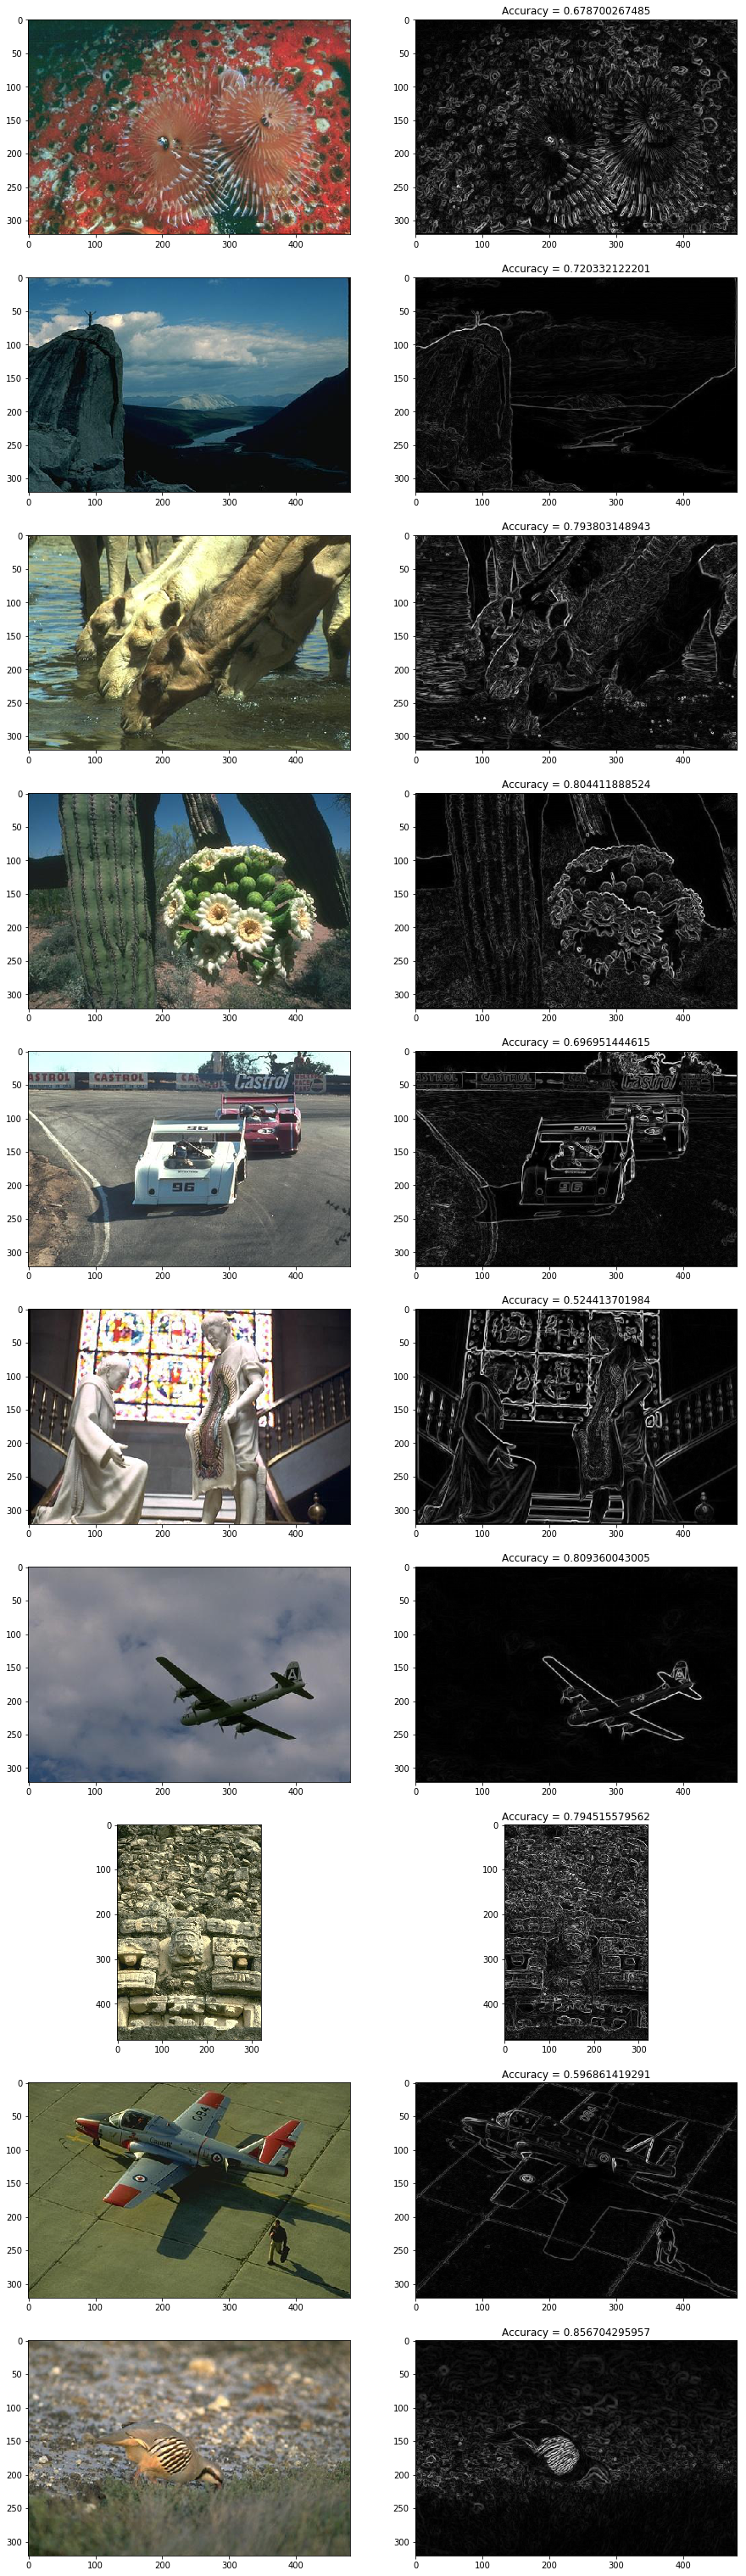

In [42]:
### Fill your code here
### Report the accuracy obtained
### Report any improvements you have tried
fig, axs = plt.subplots(10,2,figsize=(15,55))

for i,name in enumerate(imageList):
    img = my_imread('./data/img/'+name)
    rgb_img = convert2RGB(img)
    gray_img = convert2Gray(img)
    sobel_edge = sobel(gray_img)

    axs[i,0].imshow(rgb_img)
    axs[i,1].imshow(sobel_edge,cmap='gray')

    gt_img = convert2Gray(my_imread('./data/ground_truth/'+groudTruth[i]))
    accuracy = evaluate(sobel_edge,gt_img,'images')
    accuracies[i,0] = accuracy
    
    axs[i,1].set(title='Accuracy = '+str(accuracy))

plt.show()

## 3.2 Edge Detector 2 - Canny

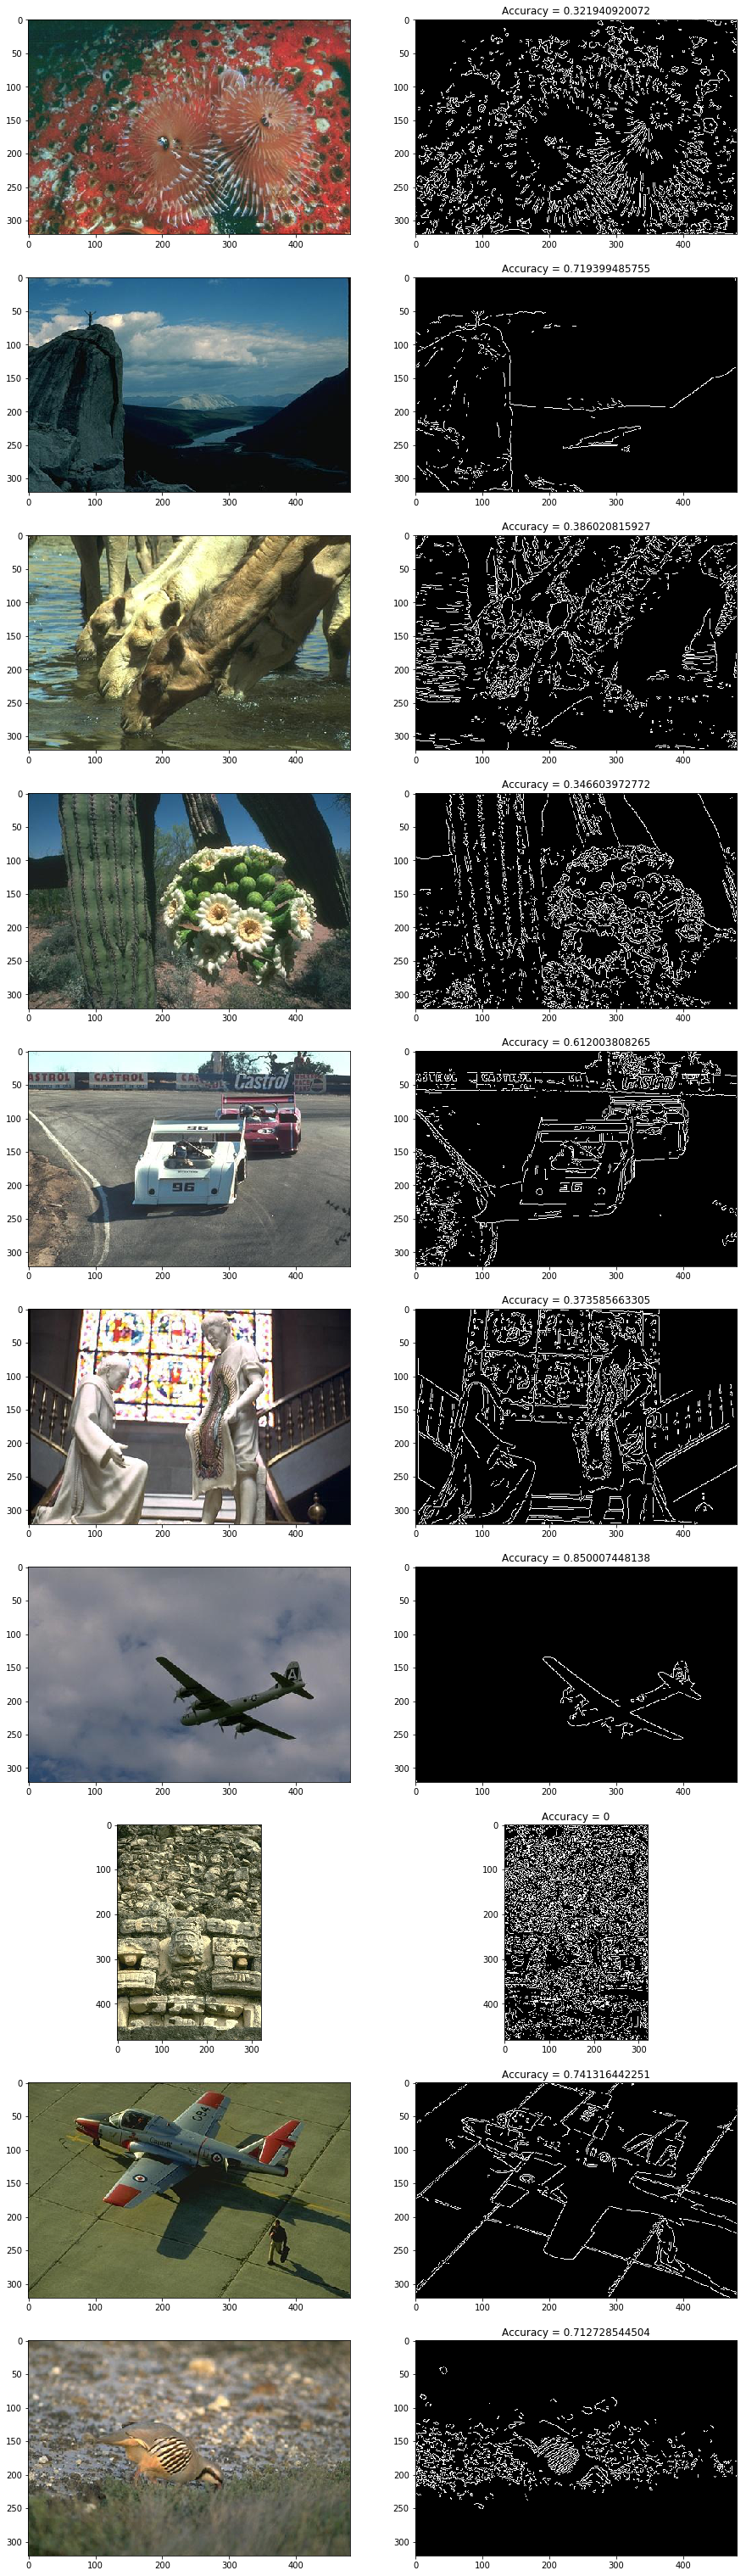

In [43]:
### Fill your code here
### Report the accuracy obtained
### Report any improvements you have tried
def canny(image, sigma=0.25):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, 150, 220)
 
    # return the edged image
    return edged

fig, axs = plt.subplots(10,2,figsize=(15,55))

for i,name in enumerate(imageList):
    img = my_imread('./data/img/'+name)
    rgb_img = convert2RGB(img)
    gray_img = convert2Gray(img)
    sobel_edge = canny(gray_img)

    axs[i,0].imshow(rgb_img)
    axs[i,1].imshow(sobel_edge,cmap='gray')

    gt_img = convert2Gray(my_imread('./data/ground_truth/'+groudTruth[i]))
    accuracy = evaluate(sobel_edge,gt_img,'images')
    accuracies[i,1] = accuracy
    
    axs[i,1].set(title='Accuracy = '+str(accuracy))

plt.show()

## 3.3 Edge Detector 3 - Structured Forests

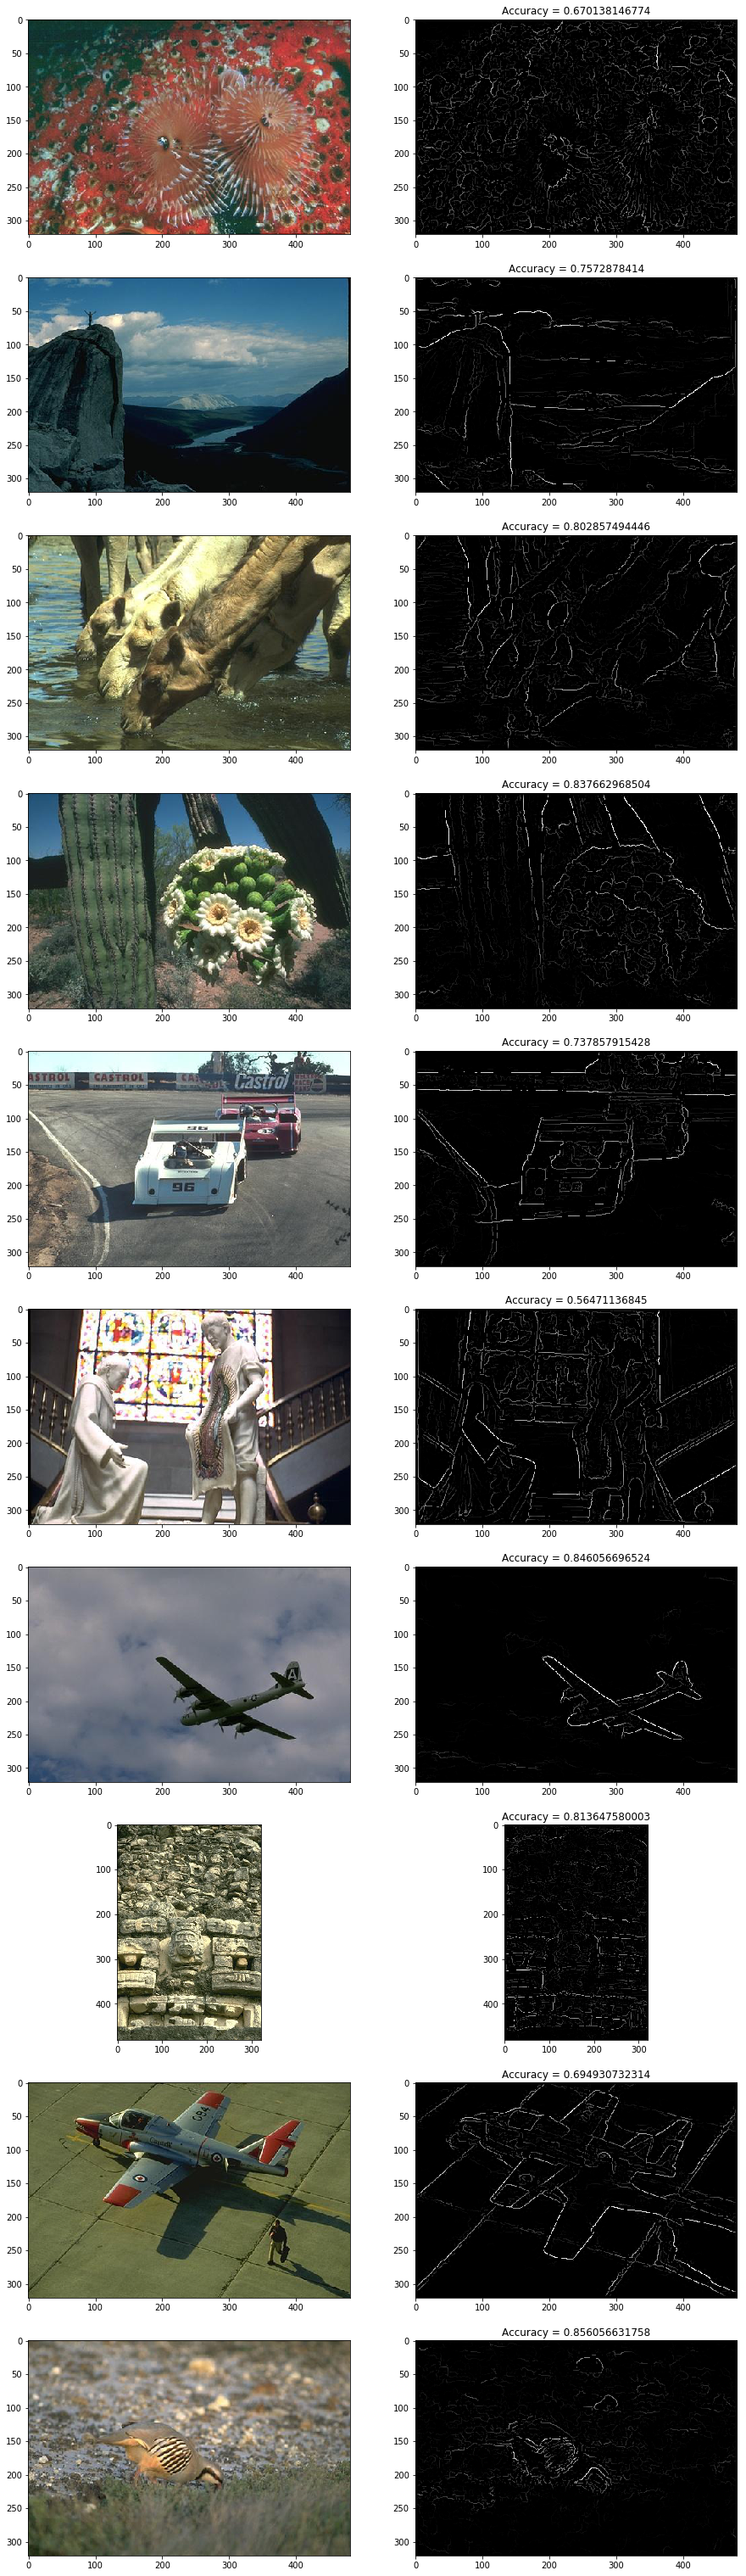

In [44]:
### Fill your code here
### Report the accuracy obtained
### Report any improvements you have tried

### Put all the images into the test folder for the toy dataset
### in the StructuredForest code. Then run StructuredForest.py
### It uses the pretrained model to do the predictions

fig, axs = plt.subplots(10,2,figsize=(15,55))

for i,name in enumerate(imageList):
    img = my_imread('./data/img/'+name)
    rgb_img = convert2RGB(img)
    sfpred_img = convert2Gray(my_imread('./data/sf_pred/'+sfList[i]))

    axs[i,0].imshow(rgb_img)
    axs[i,1].imshow(sfpred_img,cmap='gray')

    gt_img = convert2Gray(my_imread('./data/ground_truth/'+groudTruth[i]))
    accuracy = evaluate(sfpred_img,gt_img,'images')
    accuracies[i,2] = accuracy
    
    axs[i,1].set(title='Accuracy = '+str(accuracy))

plt.show()

In [47]:
import pandas as pd

In [63]:
df = pd.DataFrame({'Names':imageList,'Sobel':accuracies[:,0],'Canny':accuracies[:,1],
                   'Structured_Forest':accuracies[:,2]}, columns=['Names','Sobel','Canny','Structured_Forest'])
df.append({'Names':'mean','Sobel':np.mean(accuracies[:,0]),
           'Canny':np.mean(accuracies[:,1]),'Structured_Forest':np.mean(accuracies[:,2])},ignore_index=True)

Names     Sobel     Canny  Structured_Forest
0   12084.jpg  0.678700  0.321941           0.670138
1   14037.jpg  0.720332  0.719399           0.757288
2   16077.jpg  0.793803  0.386021           0.802857
3   19021.jpg  0.804412  0.346604           0.837663
4   21077.jpg  0.696951  0.612004           0.737858
5   24077.jpg  0.524414  0.373586           0.564711
6    3096.jpg  0.809360  0.850007           0.846057
7   33039.jpg  0.794516  0.000000           0.813648
8   37073.jpg  0.596861  0.741316           0.694931
9    8023.jpg  0.856704  0.712729           0.856057
10       mean  0.727605  0.506361           0.758121